Reading file and printing out dataframe head

In [1]:
import pandas as pd
df = pd.read_csv("WineQT.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Creating heatmap to identify three chemical features

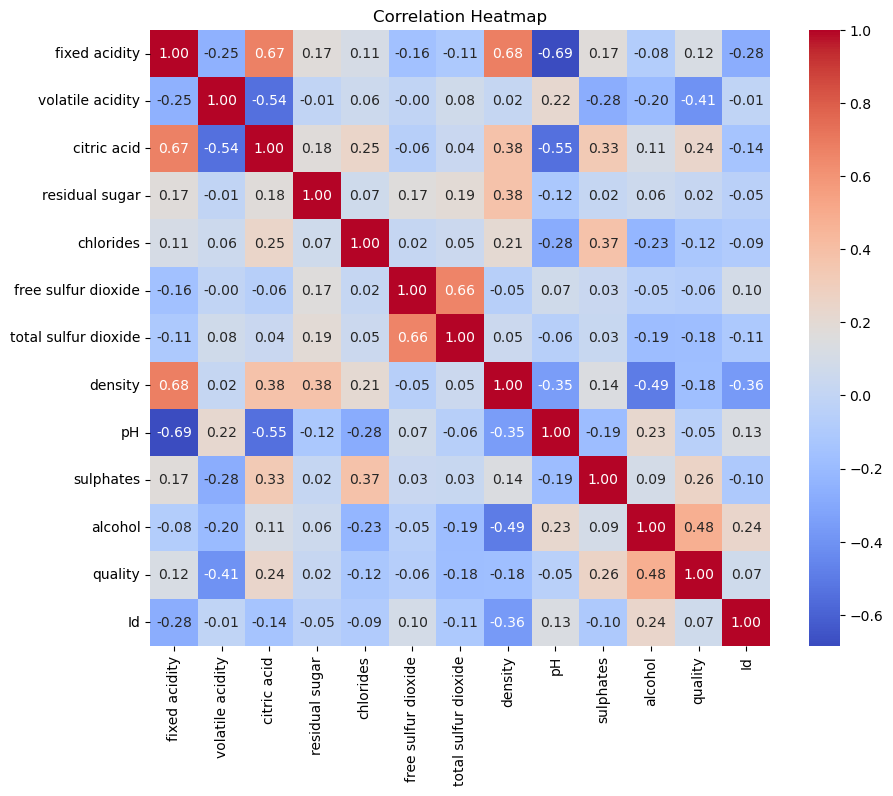

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

As we can see with the heatmap above, the attributes with the strongest correlation are the fixed acidity with density (0.68), free sulfer dioxide with totaly sulfer dioxide(0.66), and fixed acidity with citric acid(0.67).

Creating bar graphs with 4 attributes; Alcohol, pH, density, and quality

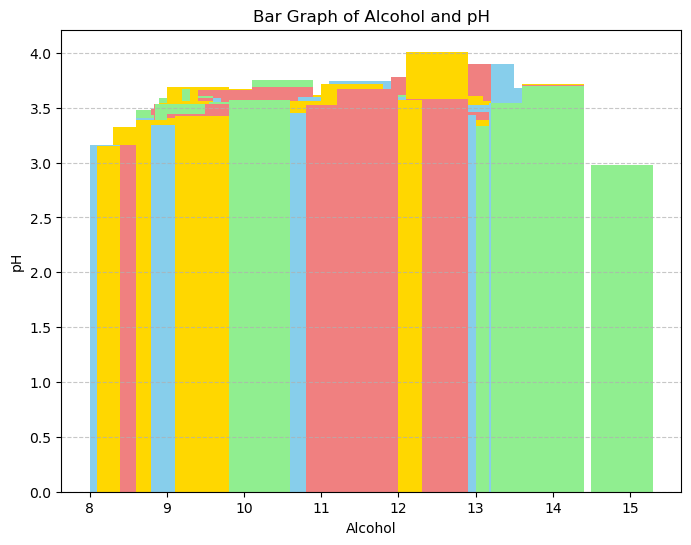

In [26]:
categories = df['alcohol']
values = df['pH']

plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Bar Graph of Alcohol and pH')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: Add a grid

plt.show()

Bar graph showing alcohol and density

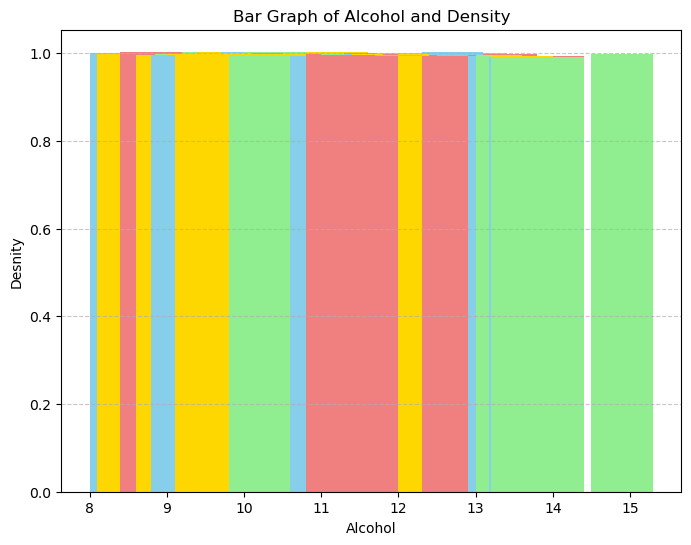

In [18]:
categories = df['alcohol']
values = df['density']

plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold']) # Optional: Customize bar colors
plt.xlabel('Alcohol')
plt.ylabel('Desnity')
plt.title('Bar Graph of Alcohol and Density')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: Add a grid

plt.show()

Bar graph showing Alchol and Quality

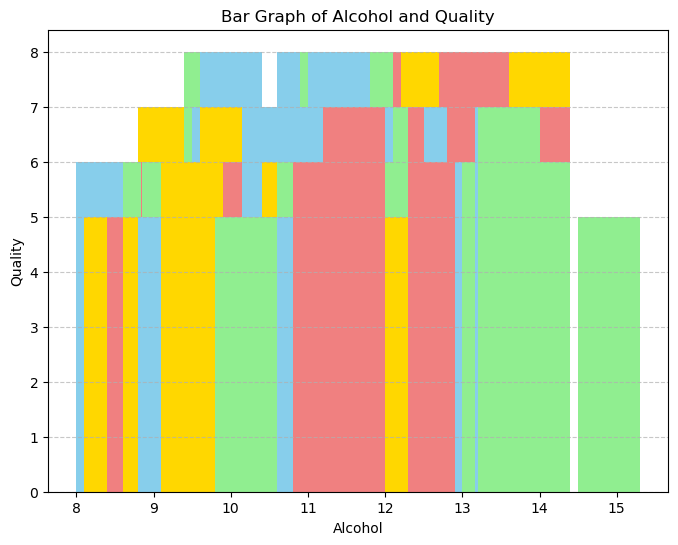

In [17]:
categories = df['alcohol']
values = df['quality']

plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.bar(categories, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold']) # Optional: Customize bar colors
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Bar Graph of Alcohol and Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: Add a grid

plt.show()

Creating line plots for the same attributes

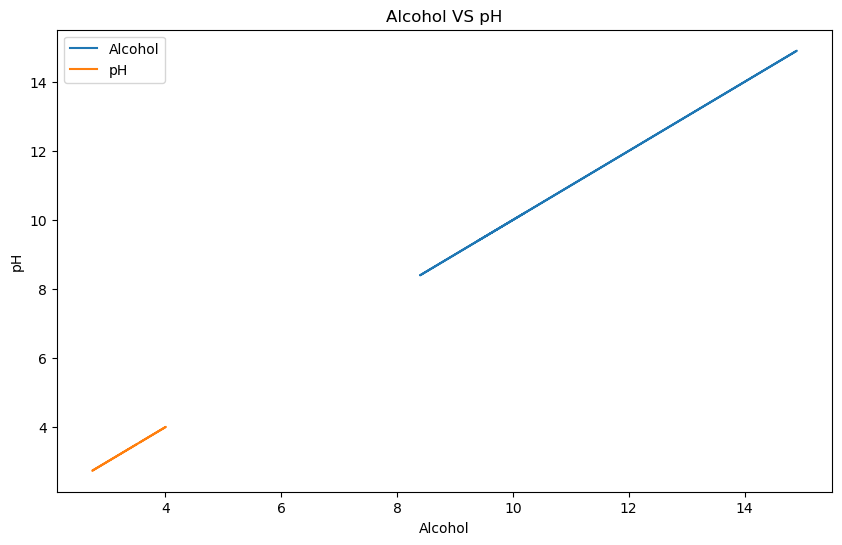

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['alcohol'], df['alcohol'], label='Alcohol')
plt.plot(df['pH'], df['pH'], label='pH')

plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Alcohol VS pH')

plt.legend(loc='best')

plt.show()

Line graph for alcohol and density

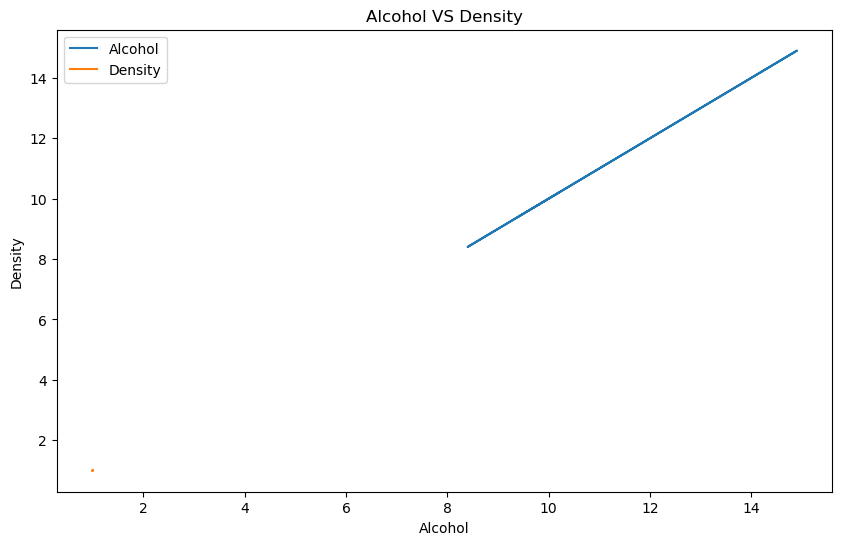

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['alcohol'], df['alcohol'], label='Alcohol')
plt.plot(df['density'], df['density'], label='Density')

plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Alcohol VS Density')

plt.legend(loc='best')

plt.show()

Line graph for alcohol and quality

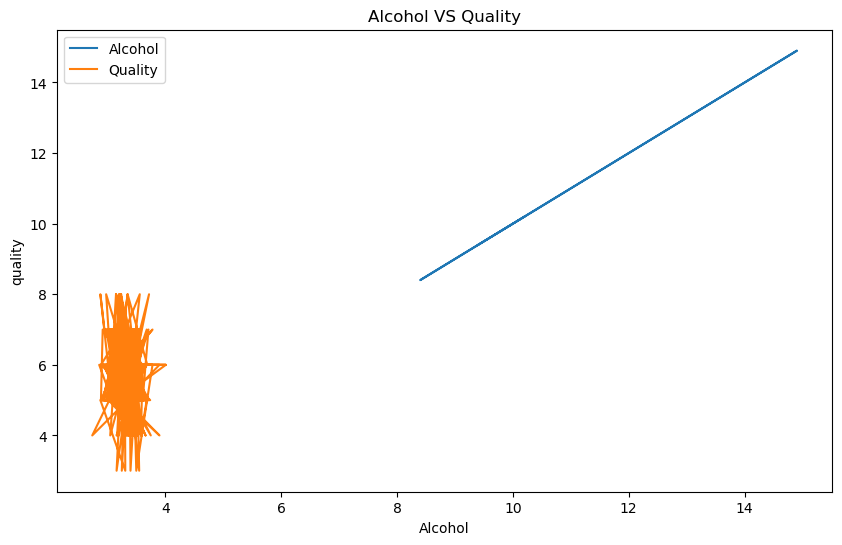

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['alcohol'], df['alcohol'], label='Alcohol')
plt.plot(df['pH'], df['quality'], label='Quality')

plt.xlabel('Alcohol')
plt.ylabel('quality')
plt.title('Alcohol VS Quality')

plt.legend(loc='best')

plt.show()

Calculating K-Means (due to limitations visualization is broken into three graphs)

K-Means with fixed acidity, and volatile acidity

C:\Users\arive\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


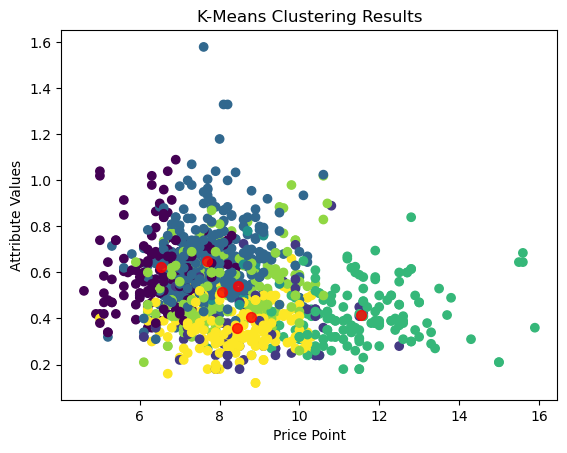

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']]

# Handle missing values
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels for each data point
df['cluster_label'] = kmeans.labels_

# Visualize clusters
plt.scatter(df['fixed acidity'], df['volatile acidity'], c=df['cluster_label'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)
plt.xlabel('Price Point')
plt.ylabel('Attribute Values')
plt.title('K-Means Clustering Results')
plt.show()

K-Means with citric acid and chlorides

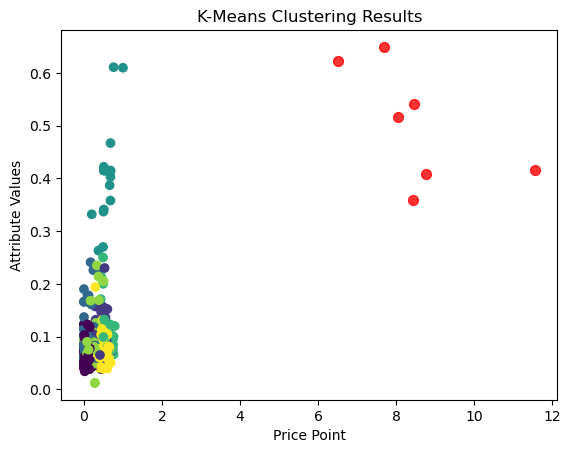

In [60]:
# Visualize clusters
plt.scatter(df['citric acid'], df['chlorides'],  c=df['cluster_label'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)
plt.xlabel('Price Point')
plt.ylabel('Attribute Values')
plt.title('K-Means Clustering Results')
plt.show()

K-Means with free sulfer dioxide, sulphates, and alcohol

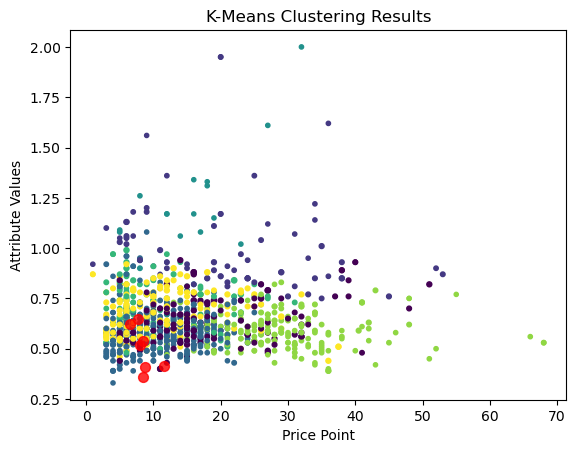

In [61]:
# Visualize clusters
plt.scatter(df['free sulfur dioxide'], df['sulphates'], df['alcohol'], c=df['cluster_label'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)
plt.xlabel('Price Point')
plt.ylabel('Attribute Values')
plt.title('K-Means Clustering Results')
plt.show()

We can set seven different price points as seen with the above data as shown with the red centroids.

K-NN

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv('WineQT.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train

array([[ 6.9 ,  0.44,  0.  , ...,  0.58, 11.4 ,  6.  ],
       [ 9.5 ,  0.55,  0.66, ...,  0.67,  9.6 ,  5.  ],
       [ 6.5 ,  0.53,  0.06, ...,  0.83, 10.3 ,  6.  ],
       ...,
       [ 9.8 ,  0.39,  0.43, ...,  0.46, 11.4 ,  5.  ],
       [ 7.1 ,  0.52,  0.03, ...,  0.6 ,  9.8 ,  5.  ],
       [ 8.8 ,  0.33,  0.41, ...,  0.62, 12.1 ,  7.  ]], shape=(857, 12))

In [84]:
y_train

array([1045,  730, 1517, 1393,  264,  540, 1437,  694,  794, 1505,  297,
       1119, 1515, 1027, 1421,   26, 1145,   42,  679,  479, 1471,  358,
        542, 1392, 1069,  372, 1451,  148, 1304,  691, 1021,  448, 1127,
       1273,   79,  810,  721, 1447, 1335,  842,  557,  819,  506, 1417,
       1480,  400, 1038,  402,  667,  860,  995,  288,  324,  562,  267,
        676,  205, 1466,  452,  444,  360, 1053, 1358, 1511,  204,  951,
       1561,  183,  357,  468, 1120,  298,  942, 1264,  706, 1245, 1256,
        342,  217, 1115,  367,  179, 1200,  989,  213, 1595,  454,  906,
        902,  745, 1226,  498,  140,  162, 1292,   53,  200,  222,   58,
       1497,  693, 1055,  955,  968,  334,  134,  662, 1078,  697, 1066,
       1112,  934,  733,   67,  577,   89,  113,  427,  270,  333,  257,
        731,  911,  744,   10,  748,  737, 1594, 1169,  847,  889,  538,
       1210, 1479,  469,  703,  369, 1353,    6,  377, 1528,   54,  781,
       1531, 1552, 1276,  622,  390,  196,  683,  2

In [85]:
X_test

array([[ 9.1  ,  0.775,  0.22 , ...,  0.51 ,  9.6  ,  5.   ],
       [ 6.9  ,  1.09 ,  0.06 , ...,  0.43 , 11.4  ,  4.   ],
       [ 9.1  ,  0.76 ,  0.68 , ...,  1.33 ,  9.1  ,  6.   ],
       ...,
       [ 7.4  ,  0.53 ,  0.12 , ...,  0.86 ,  9.2  ,  5.   ],
       [ 9.2  ,  0.31 ,  0.36 , ...,  0.86 , 12.   ,  7.   ],
       [ 9.6  ,  0.6  ,  0.5  , ...,  0.57 ,  9.7  ,  5.   ]],
      shape=(286, 12))

In [86]:
y_test

array([1333,  199, 1319,  886,  176, 1460,   21,  854, 1422,  339,  637,
       1504,   77,  352,  922,  998,  895,  388,  977, 1334,  269,  673,
          8, 1174, 1553, 1474,  384,  856, 1014,  823,  312, 1288, 1272,
        617, 1416, 1094,  426,  833,  431, 1116, 1251, 1297,  787, 1062,
        893,  655, 1338,  797, 1090, 1298,  223,  554,  157, 1008, 1229,
         50, 1207,  106,  684, 1274, 1073,  627, 1510, 1155,  762, 1099,
       1570, 1372, 1388, 1029,   72, 1413, 1212, 1059,  471, 1010,  516,
       1279, 1164, 1058,  626,  422,  980,   25, 1149,  612, 1557, 1032,
       1246,   37, 1586,  946,  647,  720,  596, 1526,  677,  993,  515,
       1397, 1299,  262, 1061, 1347,  512, 1404,  100,  466,  656,  688,
        975,  685,  284, 1134,  765, 1463,  790, 1087,   91,  882,   43,
       1057, 1476,  982, 1076,  371, 1592, 1036, 1384, 1507,  875,  609,
        226,    1,  567,  325,  665, 1100, 1065, 1262, 1518, 1591, 1060,
        430,   85, 1533, 1219,  407, 1172,  698,  8

In [87]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()

print(scaler.fit(data))

StandardScaler()


In [88]:
scaler.transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [89]:
scaler.transform([[2, 2]])

array([[3., 3.]])

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [91]:
X_train

array([[-0.77746895, -0.51844859, -1.34060923, ..., -0.45860074,
         0.84525   ,  0.41149892],
       [ 0.68604065,  0.09970291,  2.03776187, ...,  0.12567206,
        -0.78480707, -0.80875912],
       [-1.00262427, -0.01268827, -1.03348459, ...,  1.16437926,
        -0.15089599,  0.41149892],
       ...,
       [ 0.85490714, -0.79942655,  0.86045073, ..., -1.23763114,
         0.84525   , -0.80875912],
       [-0.66489129, -0.06888386, -1.18704691, ..., -0.32876234,
        -0.60368962, -0.80875912],
       [ 0.29201883, -1.13660009,  0.75807585, ..., -0.19892394,
         1.47916108,  1.63175696]], shape=(857, 12))

In [92]:
class KNN():
    def __init__(self,k):
        self.k=k
        print('Input k value: ',self.k)
        
    def fit(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train
    
    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
            distance+=(sample1[i]-sample2[i])**2 
        return np.sqrt(distance)

    def nearest_neighbors(self, test_sample):
        distances = []  # List to store distances from the test sample to each training sample

        # Loop over each sample in the training set
        for i in range(len(self.x_train)):
            # Calculate the Euclidean distance from the current training sample to the test sample
            # Append a tuple of (training label, distance) to the distances list
            distances.append((self.y_train[i], self.calculate_euclidean(self.x_train[i], test_sample)))

        # Sort the distances list in ascending order based on the distance
        distances.sort(key=lambda x: x[1])

        neighbors = []  # List to store the nearest neighbors

        # Retrieve the first 'k' nearest neighbors
        for i in range(self.k):
            # Append the label of each neighbor to the neighbors list
            neighbors.append(distances[i][0])

        # Return the list of nearest neighbors
        return neighbors

    def predict(self, test_set):
        predictions = []  # List to store predictions for each test sample

        # Loop over each sample in the test set
        for test_sample in test_set:
            # Find the nearest neighbors for the current test sample
            neighbors = self.nearest_neighbors(test_sample)

            # Extract the labels of the nearest neighbors
            labels = [sample for sample in neighbors]

            # Determine the most common label among the neighbors
            prediction = max(labels, key=labels.count)

            # Append the predicted label to the predictions list
            predictions.append(prediction)

        # Return the list of predictions for the test set
        return predictions


In [93]:
model=KNN(7) #our model
model.fit(X_train,y_train)

Input k value:  7


In [94]:
predictions=model.predict(X_test)#our model's predictions

In [95]:
X_test

array([[ 0.46088533,  1.36410371, -0.21448553, ..., -0.91303514,
        -0.78480707, -0.80875912],
       [-0.77746895,  3.13426483, -1.03348459, ..., -1.43238874,
         0.84525   , -2.02901716],
       [ 0.46088533,  1.27981033,  2.14013675, ...,  4.41033926,
        -1.2376007 ,  0.41149892],
       ...,
       [-0.49602479, -0.01268827, -0.72635994, ...,  1.35913686,
        -1.14704197, -0.80875912],
       [ 0.51717416, -1.24899127,  0.50213864, ...,  1.35913686,
         1.38860235,  1.63175696],
       [ 0.74232948,  0.38068087,  1.21876281, ..., -0.52351994,
        -0.69424834, -0.80875912]], shape=(286, 12))

In [96]:
y_test

array([1333,  199, 1319,  886,  176, 1460,   21,  854, 1422,  339,  637,
       1504,   77,  352,  922,  998,  895,  388,  977, 1334,  269,  673,
          8, 1174, 1553, 1474,  384,  856, 1014,  823,  312, 1288, 1272,
        617, 1416, 1094,  426,  833,  431, 1116, 1251, 1297,  787, 1062,
        893,  655, 1338,  797, 1090, 1298,  223,  554,  157, 1008, 1229,
         50, 1207,  106,  684, 1274, 1073,  627, 1510, 1155,  762, 1099,
       1570, 1372, 1388, 1029,   72, 1413, 1212, 1059,  471, 1010,  516,
       1279, 1164, 1058,  626,  422,  980,   25, 1149,  612, 1557, 1032,
       1246,   37, 1586,  946,  647,  720,  596, 1526,  677,  993,  515,
       1397, 1299,  262, 1061, 1347,  512, 1404,  100,  466,  656,  688,
        975,  685,  284, 1134,  765, 1463,  790, 1087,   91,  882,   43,
       1057, 1476,  982, 1076,  371, 1592, 1036, 1384, 1507,  875,  609,
        226,    1,  567,  325,  665, 1100, 1065, 1262, 1518, 1591, 1060,
        430,   85, 1533, 1219,  407, 1172,  698,  8

In [97]:
predictions

[np.int64(399),
 np.int64(1261),
 np.int64(1370),
 np.int64(427),
 np.int64(104),
 np.int64(1281),
 np.int64(733),
 np.int64(853),
 np.int64(919),
 np.int64(376),
 np.int64(771),
 np.int64(956),
 np.int64(168),
 np.int64(404),
 np.int64(919),
 np.int64(671),
 np.int64(897),
 np.int64(496),
 np.int64(721),
 np.int64(1191),
 np.int64(570),
 np.int64(671),
 np.int64(1024),
 np.int64(1173),
 np.int64(1551),
 np.int64(1434),
 np.int64(1232),
 np.int64(853),
 np.int64(1169),
 np.int64(846),
 np.int64(410),
 np.int64(1289),
 np.int64(1594),
 np.int64(1224),
 np.int64(631),
 np.int64(1096),
 np.int64(1569),
 np.int64(1128),
 np.int64(82),
 np.int64(1115),
 np.int64(1568),
 np.int64(1103),
 np.int64(292),
 np.int64(1091),
 np.int64(891),
 np.int64(1225),
 np.int64(1336),
 np.int64(1070),
 np.int64(16),
 np.int64(999),
 np.int64(630),
 np.int64(557),
 np.int64(155),
 np.int64(944),
 np.int64(1232),
 np.int64(542),
 np.int64(361),
 np.int64(692),
 np.int64(771),
 np.int64(1340),
 np.int64(1283),


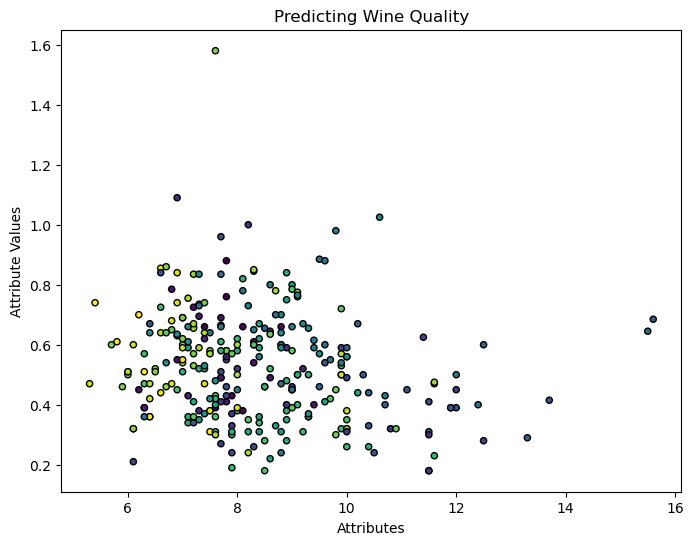

In [99]:
#'sc' is your StandardScaler and 'X_test' is your scaled test dataset
X_set, y_set = sc.inverse_transform(X_test), y_test

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot True labels
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=20)
plt.title("Predicting Wine Quality")
plt.xlabel('Attributes')
plt.ylabel('Attribute Values')
plt.show()

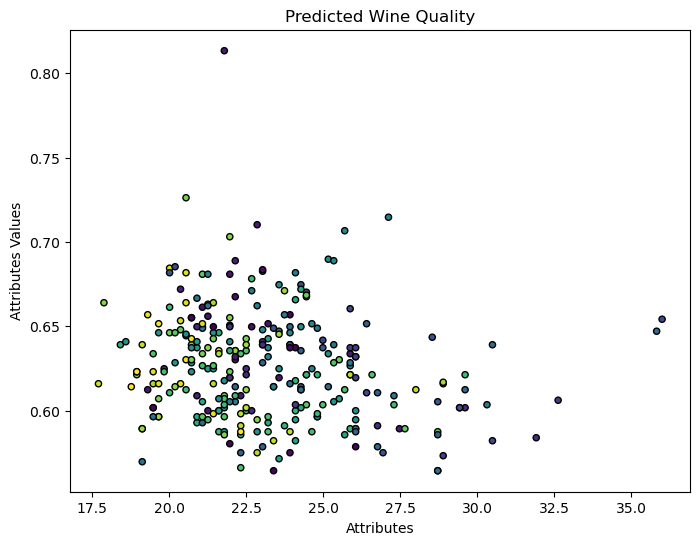

In [104]:
#'sc' is your StandardScaler and 'X_test' is your scaled test dataset
X_set, y_set = sc.inverse_transform(X_test), predictions

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot True labels using original values
plt.scatter(X_set[:, 0], X_set[:, 1], c=predictions, cmap='viridis', edgecolor='k', s=20)
plt.title("Predicted Wine Quality")
plt.xlabel('Attributes')
plt.ylabel('Attributes Values')
plt.show()


In [101]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Initialize the KNN classifier with k=5

knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

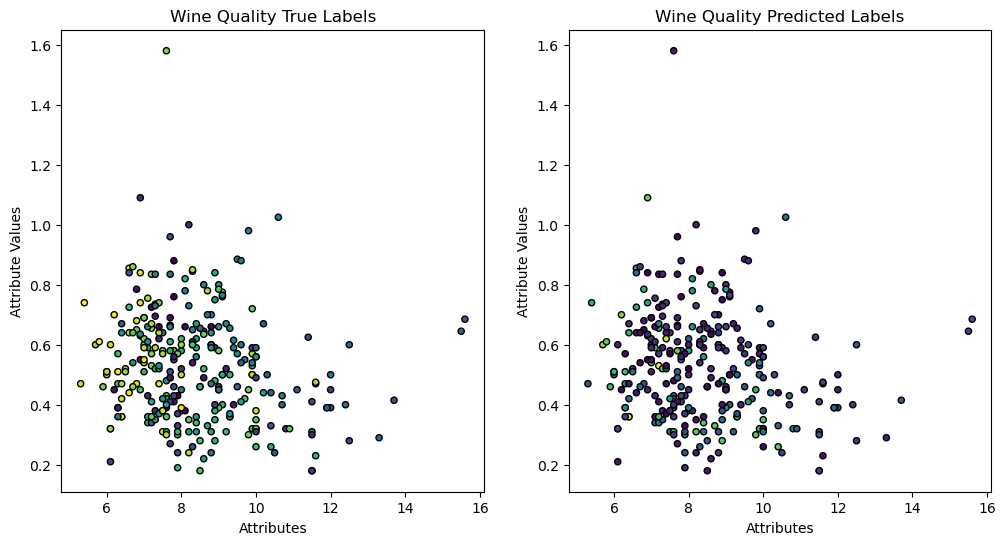

In [102]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot true labels
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=20)
plt.title("Wine Quality True Labels")
plt.xlabel('Attributes')
plt.ylabel('Attribute Values')

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=20)
plt.title("Wine Quality Predicted Labels")
plt.xlabel('Attributes')
plt.ylabel('Attribute Values')

plt.show()

The purpose of the figure above showcasing the true label and the predicted label is to show how even with the data looking similar we can still see that we are able to predict the quality of the wine in question.